# Supervised Learning Technique
LDA can produce c-1 useful components, c = claases

## TODO
split data,
lda vs pca,
explore make_classification,
complete working


k fold cross validation
function = to generate set different random states
and accuracy differently

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=200, n_features=20,
                          n_informative=3, n_redundant=2,
                          n_repeated=0, n_classes=3,
                          n_clusters_per_class=2,
                          flip_y=0.01, class_sep=1.0, random_state=13)

In [3]:
X

array([[ 6.92144218e-01, -3.22139259e+00, -1.07121824e+00, ...,
         1.28212764e+00,  1.31843898e+00,  9.69850300e-01],
       [ 1.40026443e+00, -7.14163870e-01, -1.41015371e+00, ...,
        -1.87047295e+00,  2.84476035e-01, -3.67162526e-01],
       [ 4.31241417e-01, -1.40217133e-01,  3.73744818e-01, ...,
        -1.46396201e-01, -1.21592116e+00, -1.35845969e+00],
       ...,
       [-1.28245840e+00,  1.07856425e+00, -5.25686802e-02, ...,
         1.10152268e+00,  9.45859666e-01, -8.88595023e-02],
       [ 2.29237101e+00, -3.14763380e-01, -1.02926973e+00, ...,
        -1.29627696e-01, -8.21935794e-01,  4.22381251e-01],
       [ 4.63828510e-01, -9.04177010e-01, -2.19557185e+00, ...,
        -3.31564806e-01, -3.14562106e-03,  5.89060743e-01]])

In [4]:
y

array([2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1,
       0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       2, 2])

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(X, y)

In [6]:
X.shape

(200, 20)

In [7]:
y.shape

(200,)

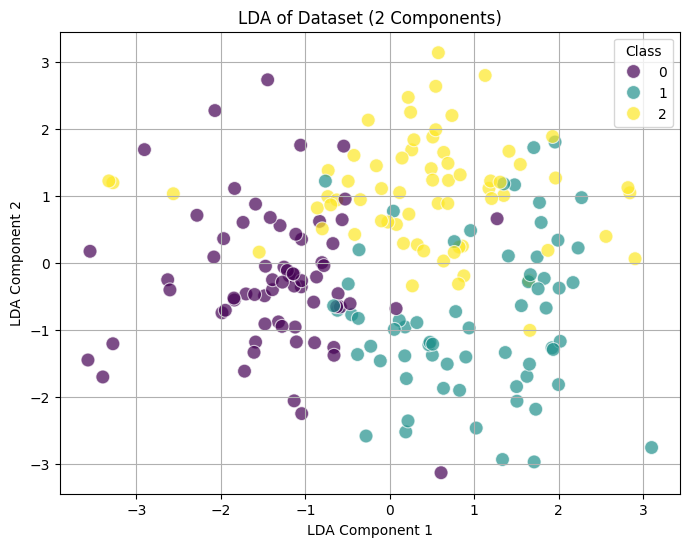

In [8]:
# Create a DataFrame for plotting
lda_df = pd.DataFrame(data=x_lda, columns=['LDA Component 1', 'LDA Component 2'])
lda_df['Class'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='Class', data=lda_df, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Dataset (2 Components)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.legend(title='Class')
plt.show()

In [9]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lda1= Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1))
])

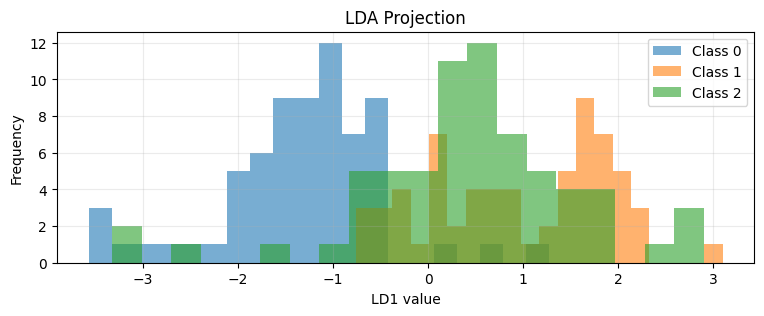

In [10]:
class_names = [f'Class {i}' for i in np.unique(y)]
plt.figure(figsize=(9,3))
for cls in np.unique(y):
  plt.hist(x_lda[y==cls, 0], bins=20, alpha=0.6,label=class_names[cls])
plt.legend()
plt.xlabel("LD1 value")
plt.ylabel("Frequency")
plt.title("LDA Projection")
plt.grid(True,alpha=0.25)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying LDA on the training data
lda_new = LinearDiscriminantAnalysis(n_components=2)
lda_new.fit(X_train, y_train)

# Making predictions
y_pred = lda_new.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.825


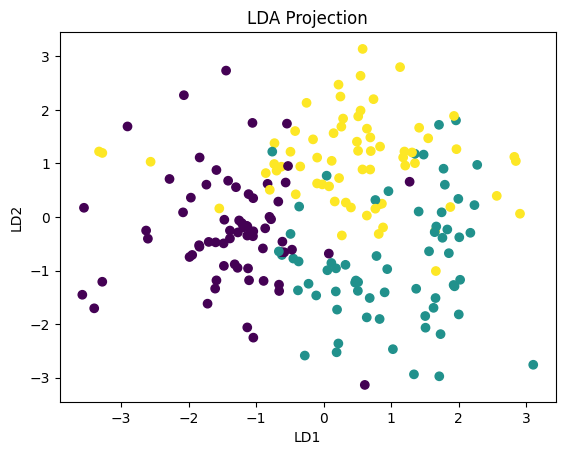

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection")
plt.show()


In [13]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)


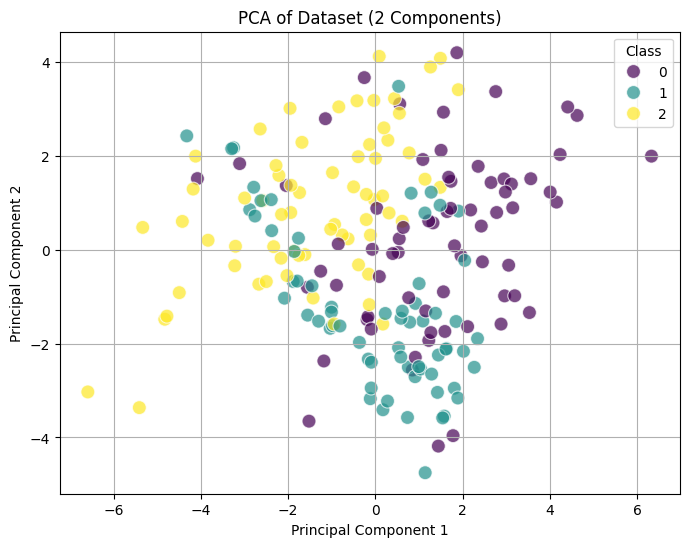

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting PCA results
pca_df = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class',palette='viridis', data=pca_df, s=100, alpha=0.7)
plt.title('PCA of Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Class')
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply PCA on the training data
pca_new = PCA(n_components=2)
x_train_pca = pca_new.fit_transform(X_train)
x_test_pca = pca_new.transform(X_test)

classifier_pca = LogisticRegression(random_state=42)
classifier_pca.fit(x_train_pca, y_train)

y_pred_pca = classifier_pca.predict(x_test_pca)

print("Accuracy using PCA ", accuracy_score(y_test, y_pred_pca))

Accuracy using PCA  0.675
